In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from molmaps import load_map

from joblib import dump, load

colmaps = {  'p1': 'Dipole Moment',
             'p2': 'HOMO energy',
             'p3': 'LUMO energy',
             'p4': 'zero-point vibrational energy',
             'p5': 'atomization energy at zero kelvin',
             'p6': 'atomization energy at room temp.'}


def MinMaxScaleClip(df):
    from molmaps.config import load_config
    scaleinfo = load_config(metric='scale')
    res = (df - scaleinfo['min']) / ((scaleinfo['max'] - scaleinfo['min']) + 1e-8)
    res = res.clip(0,1)
    return res

In [15]:
mp = load_map('./cosine_tsne.mp')

In [16]:
dfx = pd.read_csv('./molecule_open_data/candidate_train.csv')
dfx = dfx.set_index('id')
dfy = pd.read_csv('./molecule_open_data/train_answer.csv')
dfy = dfy.set_index('id')


df = dfx.join(dfy)

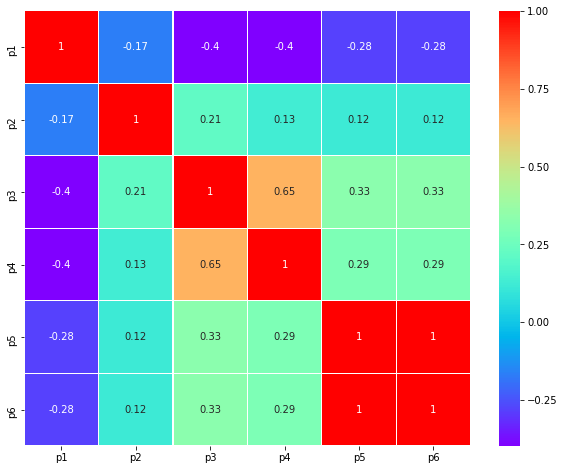

In [36]:
f, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(dfy.corr(), cmap = 'rainbow',annot = True, fmt='.2g', linewidths = 0.1)

plt.savefig('./ycorr.png', bbox_inches="tight", dpi = 300)

In [38]:
df_scale = MinMaxScaleClip(dfx)

In [41]:
X = mp.batch_transform(df_scale.values, scale = False, n_jobs = 20)

100%|##########| 79267/79267 [19:59<00:00, 66.08it/s] 


In [ ]:
dump(X, './tmpignore/X.data')
dump(Y, './tmpignore/Y.data')

In [51]:
Y = df[df.columns[-6:]].values

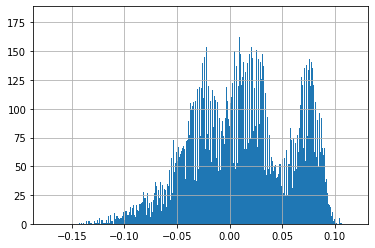

In [57]:
dfy['p3'].hist(bins = 1680)

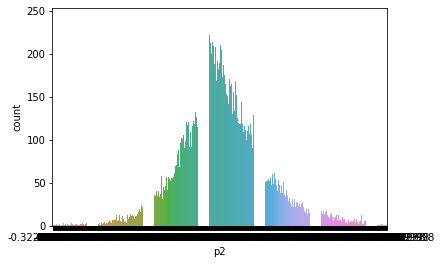

In [60]:
sns.countplot(dfy['p2'])

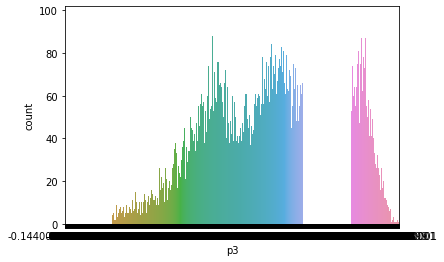

In [61]:
sns.countplot(dfy['p3'])